In [1]:
#Binary tree data structure
#http://www.techrepublic.com/article/huffman-coding-in-python/
class Node(object):
	left = None
	right = None
	item = None
	weight = 0

	def __init__(self, i, w):
		self.item = i
		self.weight = w

	def setChildren(self, ln, rn):
		self.left = ln
		self.right = rn

	def __repr__(self):
		return "%s - %s — %s _ %s" % (self.item, self.weight, self.left, self.right)

	def __cmp__(self, a):
		return cmp(self.weight, a.weight)

In [2]:
#Huffman Encoder
#http://www.techrepublic.com/article/huffman-coding-in-python/

from itertools import groupby
from heapq import *


#Huffman encoder  
def huffman(input):
    itemqueue =  [Node(a,len(list(b))) for a,b in groupby(sorted(input))]
    heapify(itemqueue)
    while len(itemqueue) > 1:
        l = heappop(itemqueue)
        r = heappop(itemqueue)
        n = Node(None, r.weight+l.weight)
        n.setChildren(l,r)
        heappush(itemqueue, n) 
        
    codes = {}
    def codeIt(s, node):
        if node.item:
            if not s:
                codes[node.item] = "0"
            else:
                codes[node.item] = s
        else:
            codeIt(s+"0", node.left)
            codeIt(s+"1", node.right)
    codeIt("",itemqueue[0])
    return codes, "".join([codes[a] for a in input])


In [4]:
class Node:
    def __init__(self, value, frequency):
        self.value = value
        self.frequency = frequency
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.frequency < other.frequency

    def __eq__(self, other):
        if other is None:
            return False
        if not isinstance(other, Node):
            return False
        return self.frequency == other.frequency


In [5]:
import numpy as np
def entropy(labels,degree):
    """ Computes entropy of label distribution. """
    n_labels = len(labels)

    if n_labels <= 1:
        return 0

    [counts, bins]  = np.histogram(labels,np.append(np.unique(labels),np.inf))
    probs = counts.astype(float) / float(n_labels)
    

    # Compute standard entropy.
    if(degree==1):
        ent = -np.sum(np.multiply(probs,np.log2(probs)))
    else:
        ent = np.log2(np.sum(np.power(probs,degree)))/(1-degree)

    return ent

#  predictive coding


In [6]:
#Lossless image copmpression using predictive coding. For reference see below
#(https://web.stanford.edu/class/ee398a/handouts/lectures/06-Prediction.pdf)

from itertools import product


#Returns prediction blocks and the corresponding pixels in the image
#Very naive implementation, neglects boundaries, can be improved further
def pred_vectors(img,pred_size):
    (n,m)=img.shape #image size
    k,l=pred_size #Size of the predictive window
    
    fvec=np.zeros([(n-k-1)*(m-2*l),2*k*l+k+l])
    #print(fvec.shape)
    label = np.zeros([(n-k-1)*(m-2*l),1])
    for (i,j) in product(range(k,n-1), range(l,m-l)):
        #print(i,j)
        idx = (i-k)*(m-2*l)+j-l
        fvec_current =img[i-k:i,j-l:j+l+1].reshape([-1])
        fvec_current = np.append(fvec_current,img[i,j-l:j].reshape([-1]))
        fvec[idx,:]=fvec_current
        label[idx]=img[i,j]
        
    return fvec, label



fvec,label = pred_vectors(img,[5,5])

# Part-3: Linear regression algorithm 


In [9]:
from collections import Counter
import heapq
from itertools import groupby

def huffman(input):
    freq = Counter(input)
    heap = [[weight, [symbol, ""]] for symbol, weight in freq.items()]
    heapq.heapify(heap)
    
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    
    huffman_dict = {sym: code for sym, code in heap[0][1:]}
    return huffman_dict

# Test Huffman encoding with an example string
input_string = "Huffman coding example"
huffman_dict = huffman(input_string)
print(huffman_dict)


{'i': '0000', 'l': '0001', 'm': '001', 'n': '010', 'o': '0110', 'p': '0111', 'u': '1000', 'x': '1001', ' ': '1010', 'H': '10110', 'c': '10111', 'a': '1100', 'd': '11010', 'g': '11011', 'e': '1110', 'f': '1111'}


# Part-4: MLP algorithm (initial phase)

In [10]:
#Second trial: MLP

import tensorflow as tf

def mlp(x, hidden_sizes, activation_fn=tf.nn.relu,dropout_rate=1.0,std_dev=1.0):
    if not isinstance(hidden_sizes, (list, tuple)):
        raise ValueError("hidden_sizes must be a list or a tuple")
    scope_args = {'initializer': tf.random_normal_initializer(stddev=std_dev)}
    for k in range(len(hidden_sizes)-1):
        layer_name="weights"+str(k)
        #FC layers
        with tf.variable_scope(layer_name, **scope_args):
            W = tf.get_variable('W', shape=[x.shape[-1], hidden_sizes[k]])
            #b = tf.get_variable('b', shape=[hidden_sizes[k]])
            x = activation_fn(tf.matmul(x, W))# + b)
            #Dropout before the last layer
            x = tf.nn.dropout(x, keep_prob=dropout_rate)
    #Softmax layer
    with tf.variable_scope('outlayer', **scope_args):
        W = tf.get_variable('W', shape=[x.shape[-1], hidden_sizes[-1]])
        #b = tf.get_variable('b', shape=[hidden_sizes[-1]])
        return tf.matmul(x, W)# + b
    


# Part-4-a: MLP with MSE loss

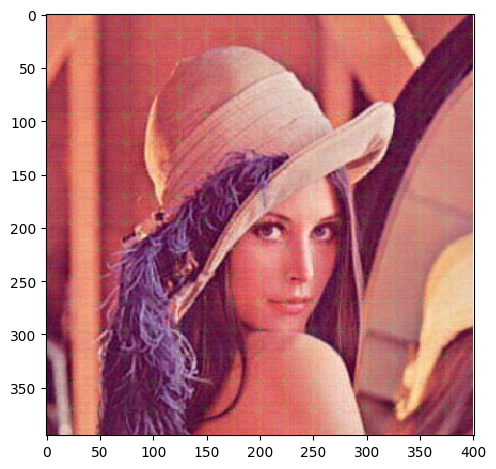

iteration 0	 mse loss: 0.24812	 entropy1: inf	 entropy2: inf	 Huffman bitrate: 0.000
iteration 2000	 mse loss: 0.24633	 entropy1: inf	 entropy2: inf	 Huffman bitrate: 0.000
iteration 4000	 mse loss: 0.24625	 entropy1: inf	 entropy2: inf	 Huffman bitrate: 0.000
iteration 6000	 mse loss: 0.24672	 entropy1: inf	 entropy2: inf	 Huffman bitrate: 0.000
iteration 8000	 mse loss: 0.24615	 entropy1: inf	 entropy2: inf	 Huffman bitrate: 0.000
iteration 10000	 mse loss: 0.24631	 entropy1: inf	 entropy2: inf	 Huffman bitrate: 0.000
iteration 12000	 mse loss: 0.24615	 entropy1: inf	 entropy2: inf	 Huffman bitrate: 0.000
iteration 14000	 mse loss: 0.24617	 entropy1: inf	 entropy2: inf	 Huffman bitrate: 0.000
iteration 16000	 mse loss: 0.24677	 entropy1: inf	 entropy2: inf	 Huffman bitrate: 0.000
iteration 18000	 mse loss: 0.24625	 entropy1: inf	 entropy2: inf	 Huffman bitrate: 0.000
iteration 20000	 mse loss: 0.24633	 entropy1: inf	 entropy2: inf	 Huffman bitrate: 0.000
iteration 22000	 mse loss: 0.

In [1]:
import tensorflow as tf
import numpy as np
from scipy.stats import entropy
import skimage.io


# Generate random data
fvec = np.random.rand(1000, 10)  # Replace with your data
label = np.random.rand(1000, 1)  # Replace with your labels

res = skimage.io.imread('../test_img/mlp.png')
skimage.io.imshow(res)
skimage.io.show()
# Normalize the vectors and labels
fvec_n = fvec / np.round(np.max(label))
label_n = label / np.round(np.max(label))

# Create a TensorFlow Dataset
def prepare_data():
    return tf.data.Dataset.from_tensor_slices((fvec_n, label_n)).shuffle(len(fvec_n)).batch(100)

# Define the model architecture using Keras API
def create_mlp():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dense(2, activation='relu'),
        tf.keras.layers.Dense(1)  # Output layer, no activation for regression
    ])
    return model

# Define the training function
def test_regression(model_function, learning_rate=0.1):
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    @tf.function
    def train_step(model, x, y):
        with tf.GradientTape() as tape:
            y_pred = model(x)
            y = tf.cast(y, tf.float32)  # Cast y to float32
            current_loss = tf.reduce_mean(tf.abs(tf.subtract(y, y_pred)))
        grads = tape.gradient(current_loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        return current_loss

    # Create model
    model = create_mlp()
    
    # Training loop
    dataset = prepare_data()
    for iter_i in range(30001):
        for batch_xs, batch_ys in dataset:
            current_loss = train_step(model, batch_xs, batch_ys)

        if iter_i % 2000 == 0:
            y_pred_val = model(fvec_n)
            label_n_float32 = tf.cast(label_n, tf.float32)  # Cast label_n to float32 for calculations
            acc_value = tf.reduce_mean(tf.abs(tf.subtract(label_n_float32, y_pred_val)))
            err_value = np.round((y_pred_val - label_n_float32) * 255)
            entropy1_err = entropy(err_value.reshape([-1]), 1)
            entropy2_err = entropy(err_value.reshape([-1]), 2)
            huffman_err = []  # Initialize huffman_err as a list or array
            huffman_bpp = float(len(huffman_err) / float(len(err_value))) if len(err_value) > 0 else 0
            print('iteration %d\t mse loss: %.5f\t entropy1: %.5f\t entropy2: %.5f\t Huffman bitrate: %.3f' %
                  (iter_i, acc_value, entropy1_err, entropy2_err, huffman_bpp))

# Run the regression test
test_regression(create_mlp(), learning_rate=0.05)
